# Dropout y Batchnorm

### Importaciones

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Input, Dense, Activation,Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import cv2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Lectura de la información

In [2]:
(X_entr, y_entr), (X_val, y_val) = mnist.load_data()

print("Número de ejemplos de entrenamiento :", X_entr.shape[0], "y cada imagen con dimensiones (%d, %d)"%(X_entr.shape[1], X_entr.shape[2]))
print("Número de ejemplos de validación:    ", X_val.shape[0],  "y cada imagen con dimensiones (%d, %d)"%(X_val.shape[1], X_val.shape[2]))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Número de ejemplos de entrenamiento : 60000 y cada imagen con dimensiones (28, 28)
Número de ejemplos de validación:     10000 y cada imagen con dimensiones (28, 28)


### Preparación de los datos

#### Montar Google Drive

In [3]:
# Versión para Google Colab
from google.colab import drive  # montar Google Drive
drive.mount('/content/gdrive')
DIRECTORIO = '/content/gdrive/MyDrive/CursoDL/temp/' #  directorio de trabajo

# Versión para Windows
# DIRECTORIO = 'c:/temp/'

Mounted at /content/gdrive


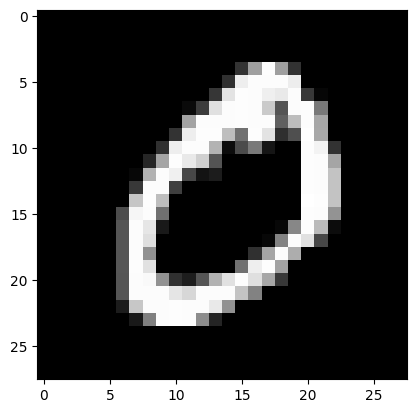

In [4]:
plt.imshow(X_entr[1], cmap='gray')
plt.show()

### Preparación de los datos

In [5]:
# cada imagen es un array de dos dimensiones: 28x28 píxeles
# se debe convertir cada imagen a un vector unidimensional de 784 px (28 * 28 = 784)

X_entr = X_entr.reshape(X_entr.shape[0], X_entr.shape[1]*X_entr.shape[2]) # mismo nº de filas (ejemplos) pero cada fila con 784 valores
X_val  = X_val.reshape(X_val.shape[0], X_val.shape[1]*X_val.shape[2])

# Tras la conversión de las imágenes en vectores 1d:
print("Número de ejemplos de entrenamiento :", X_entr.shape[0], "y cada imagen con dimensión (%d)"%(X_entr.shape[1]))
print("Número de ejemplos de validación:    ", X_val.shape[0],  "y cada imagen con dimensión (%d)"%(X_val.shape[1]))


# como todos los valores de entrada están entre 0 y 255, se normalizan así: X => (X - Xmin)/(Xmax-Xmin) = X/255
X_entr = X_entr/255
X_val = X_val/255

# conversión de la salida (con 10 valores posibles) a un vector de 10 salidas binarias:
# codificación 'one-hot'
Y_entr = to_categorical(y_entr, 10)
Y_val  = to_categorical(y_val, 10)


Número de ejemplos de entrenamiento : 60000 y cada imagen con dimensión (784)
Número de ejemplos de validación:     10000 y cada imagen con dimensión (784)


### Construcción y compilación del modelo

In [7]:
# parámetros del modelo
dim_sal = 10
dim_entr = X_entr.shape[1]
tam_lote = 128  # batch
repeticiones = 20 # epochs

# Construcción del modelo
modelo = Sequential()
modelo.add(Input(shape=(dim_entr,)))
modelo.add(Dense(512, activation='relu'))
modelo.add(BatchNormalization())
modelo.add(Dropout(0.5))
modelo.add(Dense(128, activation='relu') )
modelo.add(BatchNormalization())
modelo.add(Dropout(0.5))

modelo.add(Dense(dim_sal, activation='softmax'))

modelo.summary()
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 471,434 (1.80 MB)

 Trainable params: 470,154 (1.79 MB)

 Non-trainable params: 1,280 (5.00 KB)

### Entrenamiento

In [8]:
historial = modelo.fit(X_entr, Y_entr, batch_size=tam_lote, epochs=repeticiones, verbose=1, validation_data=(X_val, Y_val))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7911 - loss: 0.7017 - val_accuracy: 0.9557 - val_loss: 0.1389
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9363 - loss: 0.2116 - val_accuracy: 0.9697 - val_loss: 0.1015
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9513 - loss: 0.1593 - val_accuracy: 0.9710 - val_loss: 0.0921
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9601 - loss: 0.1330 - val_accuracy: 0.9746 - val_loss: 0.0827
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9635 - loss: 0.1187 - val_accuracy: 0.9765 - val_loss: 0.0763
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9679 - loss: 0.1033 - val_accuracy: 0.9784 - val_loss: 0.0733
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9693 - loss: 0.0979 - val_accuracy: 0.9778 - val_loss: 0.0743
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9736 - loss: 0.0872 - val_accuracy: 0

### Evaluación y visualización

Pérdida en validación: 0.05959866940975189
Exactitud (accuracy) en validación: 0.9829999804496765


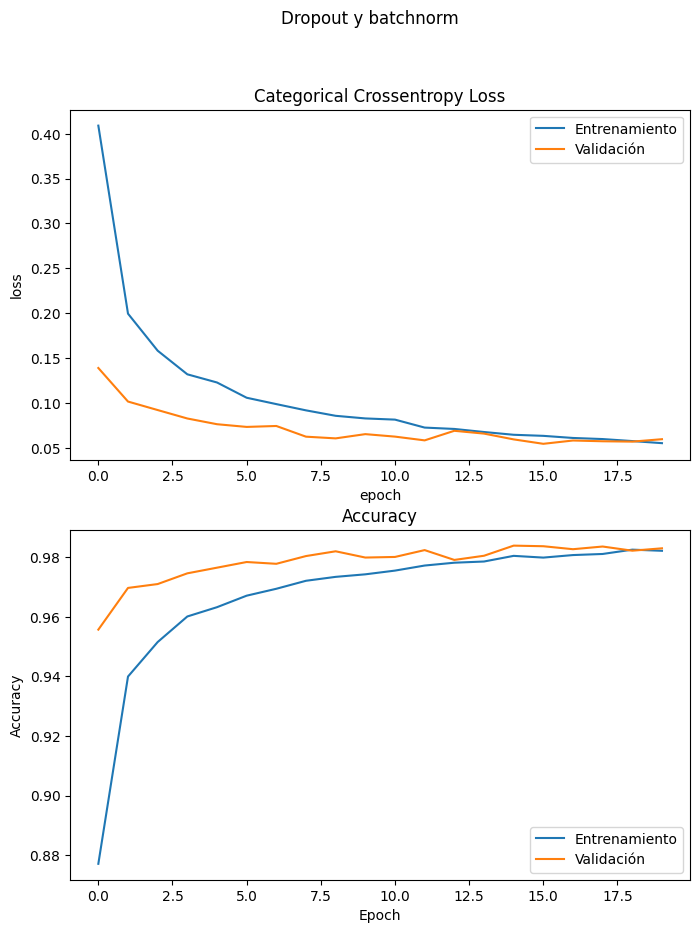

In [9]:
# modelo.metrics_names contiene los nombres de las métricas de evaluación
score = modelo.evaluate(X_val, Y_val, verbose=0)
print('Pérdida en validación:', score[0])
print('Exactitud (accuracy) en validación:', score[1])

# visualización:

fig, ejes = plt.subplots(2, figsize=(8,10))
fig.suptitle('Dropout y batchnorm')

ejes[0].plot(historial.history['loss'])
ejes[0].plot(historial.history['val_loss'])
ejes[0].set_title('Categorical Crossentropy Loss')

ejes[0].set(ylabel='loss', xlabel='epoch')
ejes[0].legend(['Entrenamiento', 'Validación'], loc='upper right')

ejes[1].plot(historial.history['accuracy'])
ejes[1].plot(historial.history['val_accuracy'])
ejes[1].legend(['Entrenamiento', 'Validación'], loc='lower right')
ejes[1].set_title('Accuracy')

ejes[1].set(xlabel='Epoch', ylabel='Accuracy');

# SIN BATCH NORMALIZATION EN EJECUCIONES ANTERIORES:
# Pérdida en validación: 0.06475276499986649
# Exactitud (accuracy) en validación: 0.9824000000953674

# CON BATCH NORMALIZATION EN EJECUCIONES ANTERIORES:
# Pérdida en validación: 0.05570771545171738
# Exactitud (accuracy) en validación: 0.9836000204086304

### Ejemplo de predicción

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
La imagen cargada representa el dígito 0 (100.00%)


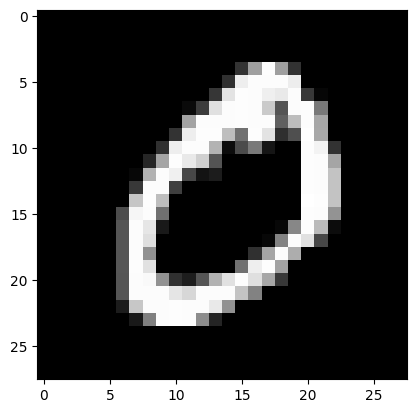

In [10]:
img = cv2.imread(DIRECTORIO + 'cero.png')     # carga la imagen
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)   # convierte a escala de grises
plt.imshow(np.asarray(img), cmap='gray', vmin=0, vmax=255);

array = np.asarray(img) # obtiene array 2D (pq es gris) con valores entre 0 y 255
array = array.reshape(1,784)  # convierte en array 1D (1x784) de bytes
array = array/255

pred = modelo.predict(array)
pred = pred[0] # resultado es una matriz que en este caso sólo tiene 1 fila
pos = np.argmax(pred) # busca la posición del elemento mayor

print ("La imagen cargada representa el dígito {} ({:.2f}%)".format(pos,100*pred[pos]))

# RESULTADOS SIN BATCH NORMALIZATION EN EJECUCIONES ANTERIORES:
#
# CON DROPOUT:
# loss: 0.0675 - accuracy: 0.9783 - val_loss: 0.0603 - val_accuracy: 0.9819
# Test score: 0.060278645102120935
# Test accuracy: 0.9818999767303467
#
# SIN DROPOUT
# accuracy: 0.9977 - val_loss: 0.0855 - val_accuracy: 0.9793
# Test score: 0.08545219677078203
# Test accuracy: 0.9793000221252441
